In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [78]:
data = pd.read_csv('regression_data1.csv')

In [3]:
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HV1,4843.0,1163.701425,1032.104682,0.00000,548.000000,809.0,1367.5,5982.0
IC1,4843.0,352.831922,171.357547,0.00000,239.000000,318.0,427.0,1500.0
IC2,4843.0,401.913690,182.660078,0.00000,283.000000,366.0,481.0,1500.0
IC3,4843.0,400.962214,166.681913,0.00000,287.000000,366.0,482.5,1394.0
IC4,4843.0,446.035102,176.689128,0.00000,325.000000,411.0,531.5,1394.0
IC5,4843.0,16483.862482,9499.090544,0.00000,11164.000000,14377.0,18819.5,174523.0
AVGGIFT,4843.0,11.836754,10.147951,2.26087,7.181818,10.0,14.5,450.0
TARGET_D,4843.0,15.624344,12.445137,1.00000,10.000000,13.0,20.0,200.0


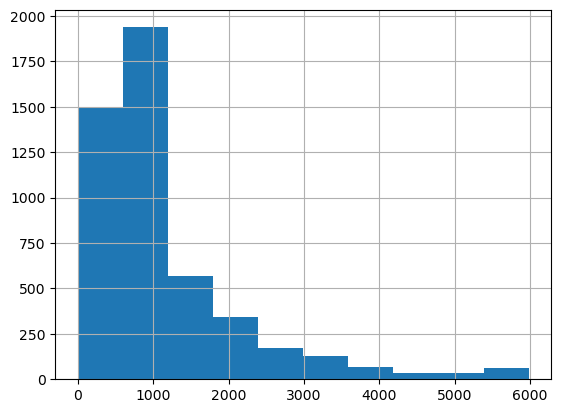

In [5]:
data['HV1'].hist()
plt.show()


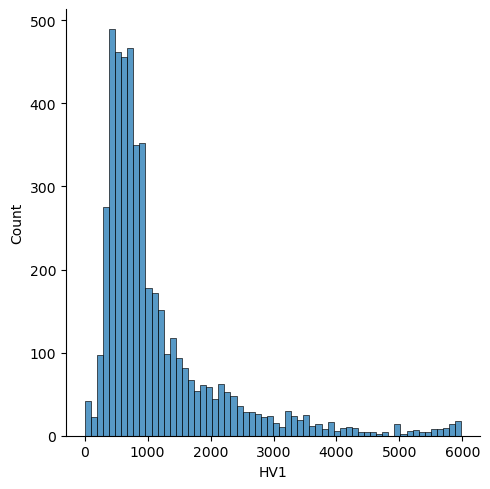

In [6]:
sns.displot(data['HV1'])
plt.show()


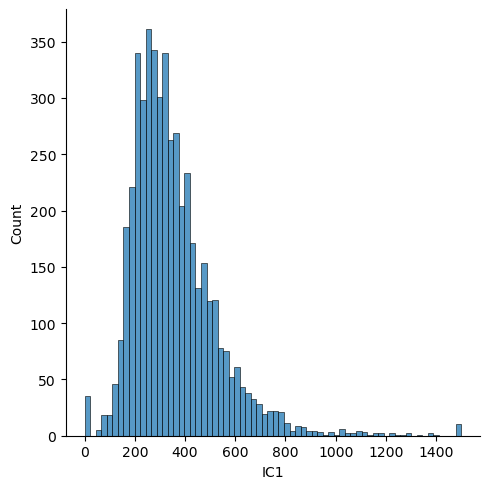

In [7]:
sns.displot(data['IC1'])
plt.show()


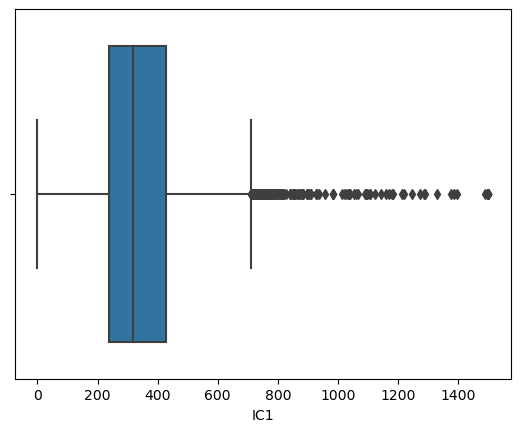

In [8]:
sns.boxplot(x=data['IC1'])
plt.show()


In [9]:
# removing the outliers from IC1 - we don't always do it, only for good reasons
# but if we want to do it, this is how:
iqr = np.percentile(data['IC1'],75) - np.percentile(data['IC1'],25)
upper_limit = np.percentile(data['IC1'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC1'],25) - 1.5*iqr


In [10]:
upper_limit

709.0

In [11]:
lower_limit

-43.0

In [12]:
data.shape

(4843, 8)

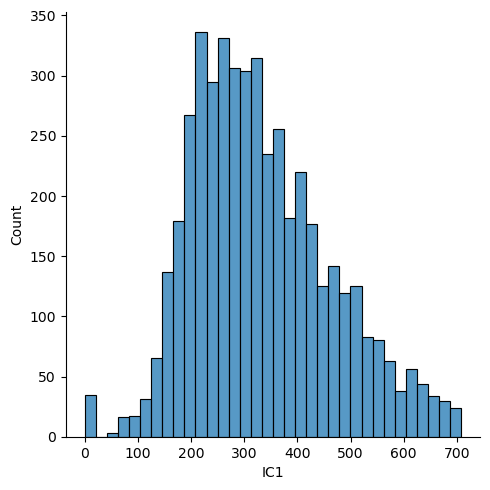

In [13]:
data1 = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)].copy()
sns.displot(data1['IC1'])
plt.show()

In [14]:
data1.shape

(4670, 8)

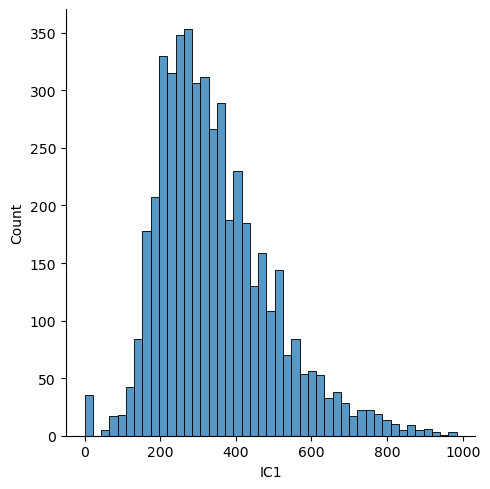

In [29]:
data2 = data[(data['IC1']>np.percentile(data['IC1'],25) - 3*iqr) & (data['IC1']<np.percentile(data['IC1'],75) + 3*iqr)].copy()
sns.displot(data2['IC1'])
plt.show()

In [35]:
data = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]

In [ ]:
#Activity 1
# Draw a box plot for the IC2.
# Print the descriptive statistics for IC2.
# Remove the outliers from the column IC2.

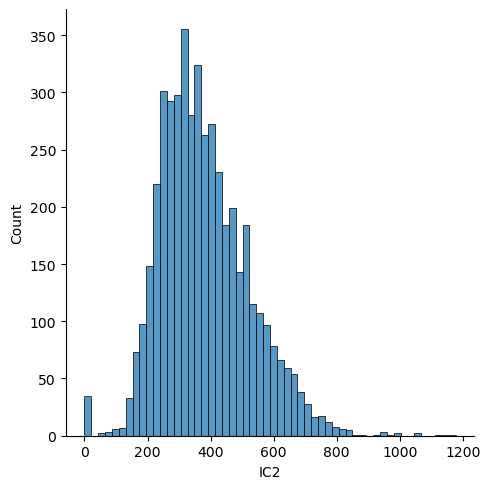

In [36]:
sns.displot(data['IC2'])
plt.show()

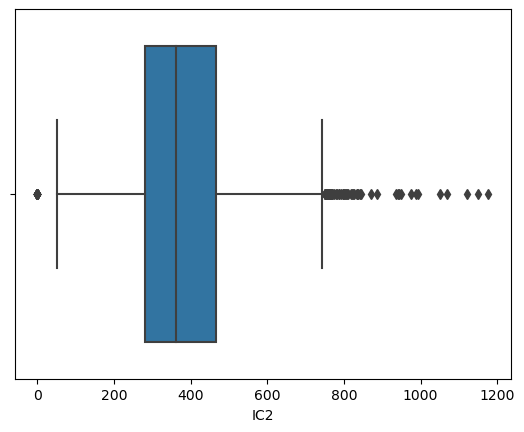

In [37]:
sns.boxplot(x=data['IC2'])
plt.show()

In [38]:
iqr2 = np.percentile(data['IC2'],75) - np.percentile(data['IC2'],25)
upper_limit2 = np.percentile(data['IC2'],75) + 1.5*iqr
lower_limit2 = np.percentile(data['IC2'],25) - 1.5*iqr

In [52]:
data['IC2'].describe()

count    4670.000000
mean      380.943255
std       141.325353
min         0.000000
25%       280.000000
50%       361.000000
75%       465.000000
max      1177.000000
Name: IC2, dtype: float64

In [53]:
upper_limit2


747.0

In [54]:
lower_limit2

-2.0

In [50]:
data2 = data[(data['IC2']>lower_limit) & (data['IC2']<upper_limit)]

In [51]:
data2.shape

(4578, 8)

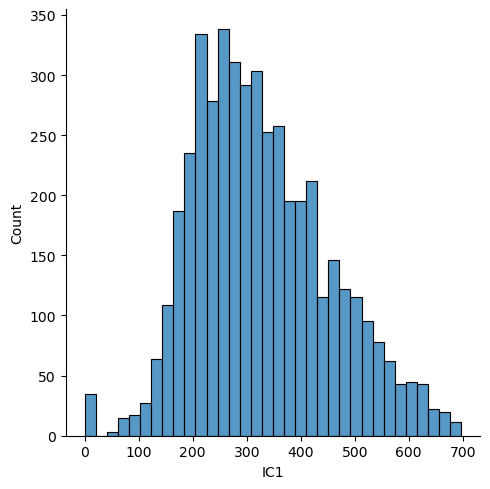

In [55]:
data3 = data[(data['IC2']>lower_limit) & (data['IC2']<upper_limit)].copy()
sns.displot(data3['IC1'])
plt.show()

In [ ]:

#End Acivity1


In [56]:
lower_limit

-43.0

In [57]:
data.shape

(4670, 8)

C:\Users\ninav\AppData\Local\Temp\ipykernel_3984\555370698.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['HV1'])


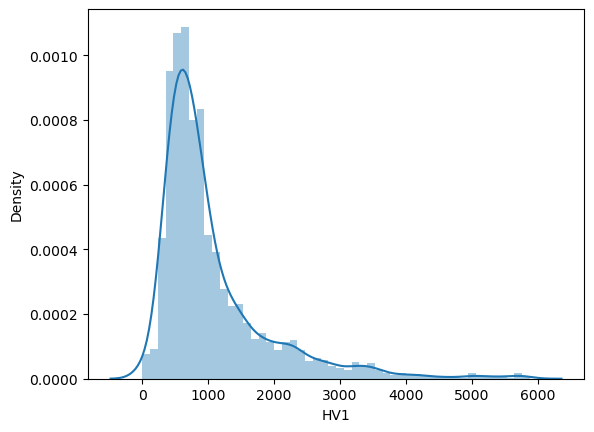

In [58]:
sns.distplot(data['HV1'])
plt.show()


In [59]:
# we want to have all the features in a reasonable (and similar) range.
# sometimes we do that by scaling (normalizing), and sometimes by perofrmming a log transformation
# or a box-cox transform

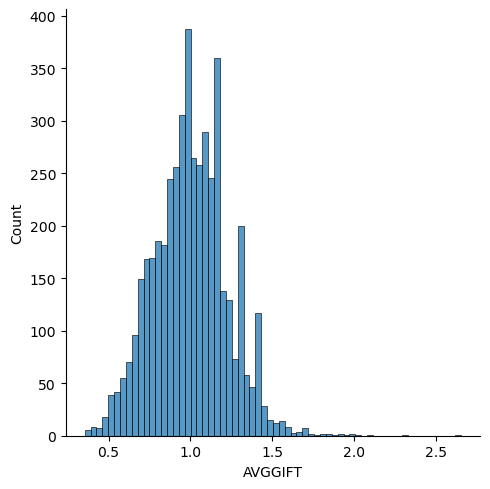

In [60]:
# Log10 tranformation: reduce range of 0 - 100000 to a range of 0-5

# Code to test how the transformation will look like.
# Here we are trying two different codes. Notice that in the first function
# we are replacing the -inf values after we take logarithm by 0 while in
# the second case we will replace them with np.NaN. The idea is that
# we will then replace those NaN values in the column with the mean or
# median of the column

def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

AVGGIFT_log = data['AVGGIFT'].apply(log_transfom_clean1)
sns.displot(AVGGIFT_log)
plt.show()


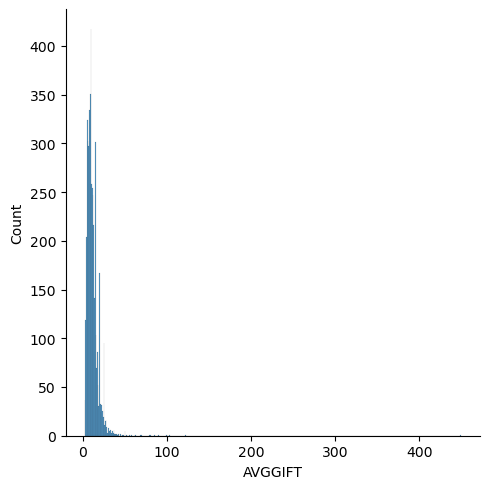

In [61]:
sns.displot(data['AVGGIFT'])
plt.show()

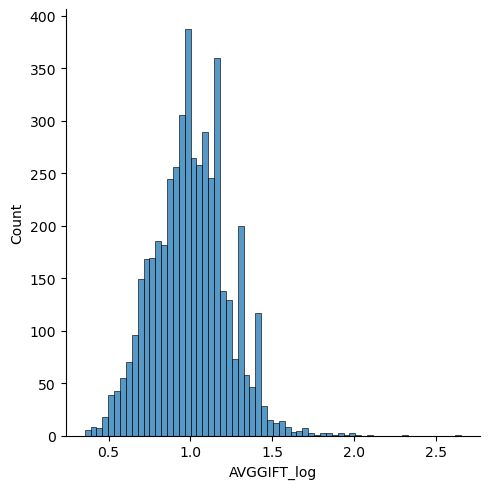

In [62]:
def log_transform_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later
data['AVGGIFT_log'] = list(map(log_transform_clean2, data['AVGGIFT']))
# Now we replace the NAN by the mean
data['AVGGIFT_log'] = data['AVGGIFT_log'].fillna(np.mean(data['AVGGIFT_log']))
sns.displot(data['AVGGIFT_log'])
plt.show()


In [ ]:
data.head()

In [64]:
data['AVGGIFT'].corr(data['AVGGIFT_log'])

0.7252863217667848

In [65]:
data = data.drop(['AVGGIFT'], axis=1)
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,TARGET_D,AVGGIFT_log
0,2346,420,446,468,503,14552,21.0,1.190332
1,497,350,364,357,384,11696,3.0,0.488551
2,1229,469,502,507,544,17313,20.0,0.875061
3,325,148,181,171,209,6334,5.0,0.826075
4,768,174,201,220,249,7802,10.0,0.943777


In [ ]:
# Activity 2
# Repeat the process(log transformation) for the column HV1. Define the function again yourself.
# Remove the tails of the transformed column to make it closer to the normal distribution.
# This time change the factor from 1.5 to 3 when calculating the upper limit and the lower limit. Check the distribution plot. Does it remove the tails effectively? If not change the factor back to 1.5 and see the results.

In [66]:
np.log10(0)



C:\Users\ninav\AppData\Local\Temp\ipykernel_3984\318420476.py:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(0)


-inf

In [ ]:
# 2



In [ ]:
#End Activity 2

In [ ]:
# # BoxCox transformation - another one of many transforms, to get the data more like normal

# # BoxCox does not like nagative values
# #Since this is median household income, we can filter out negative values:
# len(data[data['IC1']<=0])  # number of such observations.
# # if you do not want to lose this data, replace it with the mean of the column
# data['IC1_'] = np.where(data['IC1']<=0,0,data['IC1'])

# # now calculate mean of the new column , excluding zeros in the count
# mean = np.sum(data['IC1_'])/len(data[data['IC1_']>0])

# data['IC1_'] = data['IC1_'].replace(0,mean)
# # data = data.drop(['IC1'], axis=1)
# sns.displot(data['IC1_'])
# plt.show()


In [ ]:
# from scipy import stats
# xt, lmbda = stats.boxcox(data['IC1_'])
# sns.displot(xt)
# plt.show()


In [ ]:
#Activity 3
# Repeat the same steps for column IC3 for box-cox transformation.

In [ ]:
# # Repeat the same steps for column 'IC3'
# # for box cox transformation, we can also use sklearn's preprocessing module. It will be introduced later




In [ ]:


# End Activity 3


### NOTE: 
the transformations that we did before aim to make the distributions more like a normal distribution.
While there are numeric modelling methods that require this, Linear Regression is not one of them.
LR only requires the <i>error terms</i> to be normally ditributed.
We still wanted to show these transformations as they might come in handy.


In [67]:
# Normalizing and scaling ()
# going back to oiginal data
data = pd.read_csv('regression_data1.csv') 
display(data.head())
data.shape

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


(4843, 8)

In [68]:
data.corr()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
HV1,1.000000,0.703625,0.739520,0.731628,0.746706,0.737448,0.137374,0.126180
IC1,0.703625,1.000000,0.952263,0.974436,0.928996,0.811115,0.118425,0.118255
IC2,0.739520,0.952263,1.000000,0.954477,0.972286,0.875394,0.134469,0.134289
IC3,0.731628,0.974436,0.954477,1.000000,0.972117,0.829505,0.126843,0.127239
IC4,0.746706,0.928996,0.972286,0.972117,1.000000,0.868960,0.133909,0.136632
IC5,0.737448,0.811115,0.875394,0.829505,0.868960,1.000000,0.135712,0.135409
AVGGIFT,0.137374,0.118425,0.134469,0.126843,0.133909,0.135712,1.000000,0.516725
TARGET_D,0.126180,0.118255,0.134289,0.127239,0.136632,0.135409,0.516725,1.000000


In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HV1,4843.0,1163.701425,1032.104682,0.00000,548.000000,809.0,1367.5,5982.0
IC1,4843.0,352.831922,171.357547,0.00000,239.000000,318.0,427.0,1500.0
IC2,4843.0,401.913690,182.660078,0.00000,283.000000,366.0,481.0,1500.0
IC3,4843.0,400.962214,166.681913,0.00000,287.000000,366.0,482.5,1394.0
IC4,4843.0,446.035102,176.689128,0.00000,325.000000,411.0,531.5,1394.0
IC5,4843.0,16483.862482,9499.090544,0.00000,11164.000000,14377.0,18819.5,174523.0
AVGGIFT,4843.0,11.836754,10.147951,2.26087,7.181818,10.0,14.5,450.0
TARGET_D,4843.0,15.624344,12.445137,1.00000,10.000000,13.0,20.0,200.0


{'whiskers': [<matplotlib.lines.Line2D at 0x29f65b772e0>,
 'caps': [<matplotlib.lines.Line2D at 0x29f65b77820>,
 'boxes': [<matplotlib.lines.Line2D at 0x29f65b77040>],
 'medians': [<matplotlib.lines.Line2D at 0x29f65b77d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x29f65b4c040>],
 'means': []}

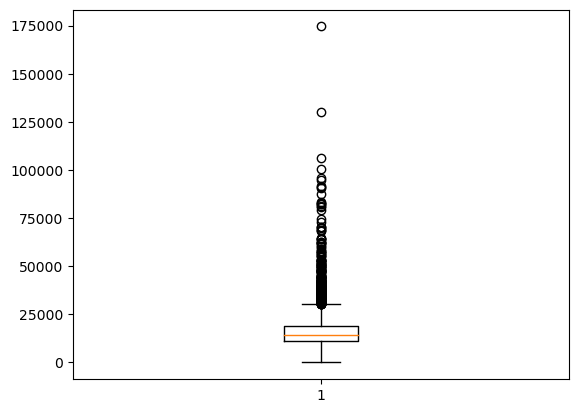

In [70]:
plt.boxplot(data['IC5'])

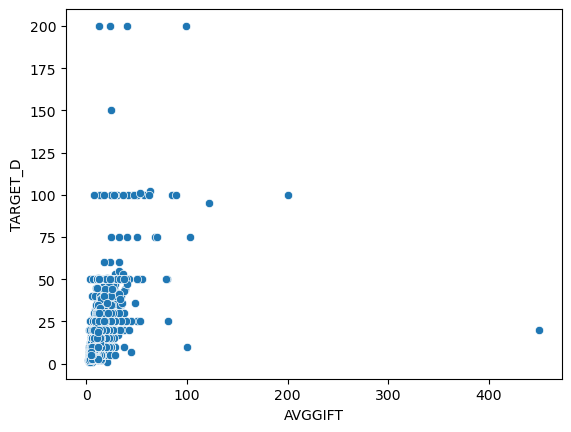

In [71]:
sns.scatterplot(x=data['AVGGIFT'], y=data['TARGET_D'])
plt.show()

In [73]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [74]:
X_num

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,2346,420,446,468,503,14552,15.500000
1,497,350,364,357,384,11696,3.080000
2,1229,469,502,507,544,17313,7.500000
3,325,148,181,171,209,6334,6.700000
4,768,174,201,220,249,7802,8.785714
...,...,...,...,...,...,...,...
4838,701,297,335,405,468,15258,15.500000
4839,3357,284,455,343,447,24240,11.857143
4840,700,322,415,356,446,14360,11.333333
4841,601,206,225,251,289,9801,13.000000


In [75]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(4843, 7)


,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,0.392177,0.280000,0.297333,0.335725,0.360832,0.083382,0.029569
1,0.083083,0.233333,0.242667,0.256098,0.275466,0.067017,0.001829
2,0.205450,0.312667,0.334667,0.363702,0.390244,0.099202,0.011701
3,0.054330,0.098667,0.120667,0.122669,0.149928,0.036293,0.009915
4,0.128385,0.116000,0.134000,0.157819,0.178623,0.044705,0.014573
...,...,...,...,...,...,...,...
4838,0.117185,0.198000,0.223333,0.290531,0.335725,0.087427,0.029569
4839,0.561184,0.189333,0.303333,0.246055,0.320660,0.138893,0.021433
4840,0.117018,0.214667,0.276667,0.255380,0.319943,0.082281,0.020263
4841,0.100468,0.137333,0.150000,0.180057,0.207317,0.056159,0.023985


In [93]:
pd.DataFrame(x_normalized, columns=X_num.columns).corr()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
HV1,1.000000,0.703625,0.739520,0.731628,0.746706,0.737448,0.137374
IC1,0.703625,1.000000,0.952263,0.974436,0.928996,0.811115,0.118425
IC2,0.739520,0.952263,1.000000,0.954477,0.972286,0.875394,0.134469
IC3,0.731628,0.974436,0.954477,1.000000,0.972117,0.829505,0.126843
IC4,0.746706,0.928996,0.972286,0.972117,1.000000,0.868960,0.133909
IC5,0.737448,0.811115,0.875394,0.829505,0.868960,1.000000,0.135712
AVGGIFT,0.137374,0.118425,0.134469,0.126843,0.133909,0.135712,1.000000


In [76]:
# scaling standard scaler: make data distributed with mean=0 and std=1
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns)

(4843, 7)


,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,1.145640,0.392017,0.241382,0.402231,0.322435,-0.203394,0.361021
1,-0.646030,-0.016528,-0.207586,-0.263776,-0.351134,-0.504086,-0.862998
2,0.063274,0.677998,0.547994,0.636234,0.554505,0.087295,-0.427397
3,-0.812697,-1.195472,-1.209550,-1.379790,-1.341676,-1.068619,-0.506239
4,-0.383432,-1.043726,-1.100046,-1.085786,-1.115266,-0.914062,-0.300687
...,...,...,...,...,...,...,...
4838,-0.448355,-0.325855,-0.366367,0.024227,0.124327,-0.129064,0.361021
4839,2.125293,-0.401727,0.290659,-0.347777,0.005462,0.816598,0.002009
4840,-0.449324,-0.179946,0.071650,-0.269776,-0.000199,-0.223609,-0.049613
4841,-0.545254,-0.856963,-0.968641,-0.899784,-0.888857,-0.703599,0.114640


In [77]:
pd.DataFrame(x_standardized, columns=X_num.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
HV1,4843.0,-9.683217e-17,1.000103,-1.127620,-0.596611,-0.343704,0.197480,4.668902
IC1,4843.0,1.591862e-16,1.000103,-2.059252,-0.664363,-0.203291,0.432871,6.695279
IC2,4843.0,2.200731e-17,1.000103,-2.200564,-0.651078,-0.196635,0.433015,6.012259
IC3,4843.0,1.261753e-16,1.000103,-2.405802,-0.683781,-0.209776,0.489232,5.958297
IC4,4843.0,-9.536502e-17,1.000103,-2.524667,-0.685088,-0.198307,0.483752,5.365711
IC5,4843.0,-6.088690e-17,1.000103,-1.735489,-0.560097,-0.221819,0.245906,16.639009
AVGGIFT,4843.0,-8.436136e-17,1.000103,-0.943725,-0.458754,-0.181016,0.262469,43.181965


In [ ]:
#Activity 4

# Keep using the same file (regression_data1.csv) for this exercise.

# Select 3 numeric columns.
# Plot distributions.
# Normalize using minmaxscaler
# Plot the distributions again.
# do the same for standardscaler

In [80]:
data = pd.read_csv('regression_data1.csv')
data

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0
...,...,...,...,...,...,...,...,...
4838,701,297,335,405,468,15258,15.500000,25.0
4839,3357,284,455,343,447,24240,11.857143,19.0
4840,700,322,415,356,446,14360,11.333333,10.0
4841,601,206,225,251,289,9801,13.000000,25.0


In [81]:
data.corr()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
HV1,1.000000,0.703625,0.739520,0.731628,0.746706,0.737448,0.137374,0.126180
IC1,0.703625,1.000000,0.952263,0.974436,0.928996,0.811115,0.118425,0.118255
IC2,0.739520,0.952263,1.000000,0.954477,0.972286,0.875394,0.134469,0.134289
IC3,0.731628,0.974436,0.954477,1.000000,0.972117,0.829505,0.126843,0.127239
IC4,0.746706,0.928996,0.972286,0.972117,1.000000,0.868960,0.133909,0.136632
IC5,0.737448,0.811115,0.875394,0.829505,0.868960,1.000000,0.135712,0.135409
AVGGIFT,0.137374,0.118425,0.134469,0.126843,0.133909,0.135712,1.000000,0.516725
TARGET_D,0.126180,0.118255,0.134289,0.127239,0.136632,0.135409,0.516725,1.000000


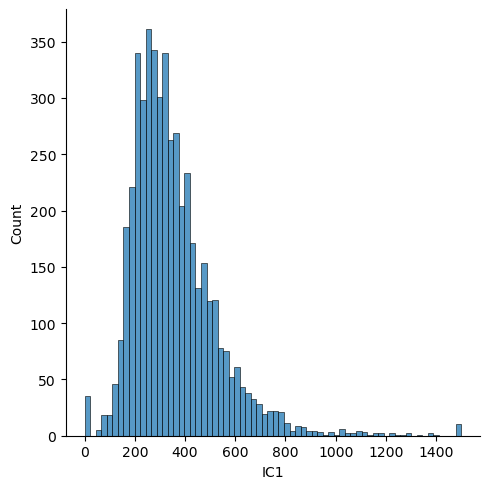

In [83]:
sns.displot(data['IC1'])
plt.show()

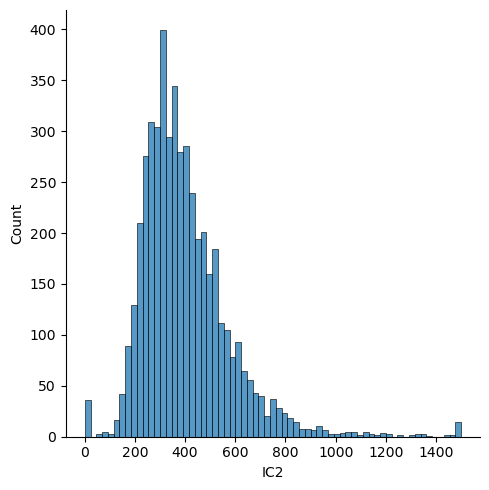

In [84]:
sns.displot(data['IC2'])
plt.show()

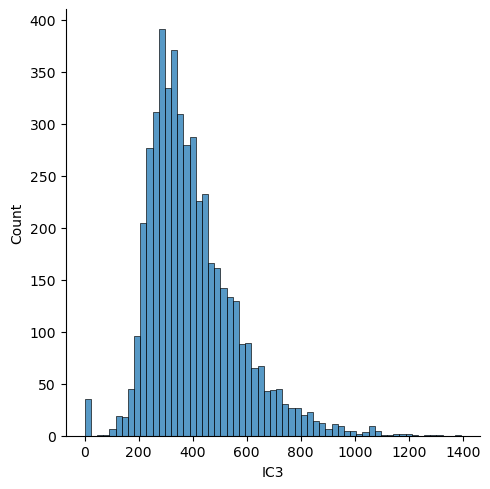

In [85]:
sns.displot(data['IC3'])
plt.show()

In [92]:
data_new = data[['IC1', 'IC2', 'IC5']]

In [90]:
y1 = data['HV1','IC4','IC5','AVGGIFT','TARGET_D']
X1 = data.drop(['HV1','IC4','IC5','AVGGIFT','TARGET_D'], axis=1)
X1_num = X.select_dtypes(include = np.number)
X1_cat = X.select_dtypes(include = object)

KeyError: ('HV1', 'IC4', 'IC5', 'AVGGIFT', 'TARGET_D')

In [ ]:
# End Activity 4